# Proje: Şarap Kalitesini Tahmin Etme - KNNR Modeli 

## Proje Tanımı
Bu projede, beyaz şarapların kimyasal özelliklerine dayanarak kalite puanlarını tahmin etmek için **K-Nearest Neighbors Regressor (KNNR)** modeli kullanılacaktır. Şarap kalitesini etkileyen kimyasal özellikler (örneğin, alkol oranı, pH, uçucu asitlik) modele giriş olarak sağlanacak ve model, kalite puanlarını tahmin etmeye çalışacaktır.

Veri seti: **Wine Quality - White Wine** (Paulo Cortez, 2009)
- Veri seti, beyaz şarapların fizikokimyasal test sonuçlarını ve kalite skorlarını içerir.
- Amaç, regresyon yöntemiyle kalite skorlarını tahmin etmektir.

---

## Projede İzlenecek Aşamalar

1. **Kütüphanelerin Eklenmesi**:
   - Gerekli Python kütüphaneleri projeye dahil edilecek.
   - Kullanılacak ana kütüphaneler: `Pandas`, `NumPy`, `Scikit-learn`, `Matplotlib`, `Seaborn`.

2. **Veri Setinin Yüklenmesi ve İncelenmesi**:
   - Veri seti yüklenecek ve temel istatistiksel özellikleri incelenecek.
   - Eksik değer kontrolü yapılacak.

3. **Veri Önişleme**:
   - Fizikokimyasal sınırlar doğrultusunda veri temizliği yapılacak.
   - İstatistiksel olarak aykırı değerler kontrol edilecek ve gerektiğinde IQR yöntemi kullanılacak.

4. **Özellik Seçimi**:
   - Kalite skoruna düşük katkı sağlayan özellikler korelasyon analizine dayanarak çıkarılacak.
   - Gerekirse yeni özellikler türetilecek.

5. **Veri Setinin Dengelenmesi**:
   - Sınıf dengesizliğini gidermek için uygun yöntemler (örneğin, Random Oversampling) uygulanacak.

6. **Veri Ölçeklendirme**:
   - KNNR modeline uygun şekilde Min-Max Normalizasyon uygulanacak.

7. **Modelin Eğitilmesi**:
   - KNNR modeli eğitilecek ve test seti üzerinde performansı değerlendirilecek.

8. **Performans Değerlendirme**:
   - Model performansı, R², MSE ve MAE gibi metriklerle değerlendirilecek.
   - Performans sonuçları görselleştirilecek.

---

## Hedef:
- **Başarı Kriteri**: Kalite skorlarını tahmin etmede yüksek R² skoru ve düşük MSE, MAE değerleri elde etmek.
- KNNR modelinin şarap kalitesini tahmin etmede uygun bir model olduğunu göstermek.

---


## Kütüphanelerin Eklenmesi

Bu adımda, proje boyunca kullanılacak gerekli Python kütüphaneleri eklenecektir. 

### Kullanılacak Kütüphaneler:
1. **Pandas**: Veri yükleme, işleme ve analiz işlemleri için.
2. **NumPy**: Sayısal hesaplamalar ve veri manipülasyonu için.
3. **Scikit-learn**:
   - Veri setinin bölünmesi, ölçeklendirilmesi ve modelleme için.
   - Performans değerlendirme metrikleri için.
4. **Matplotlib ve Seaborn**: Veri görselleştirme için.

Bu kütüphaneler, veri analizi ve modelleme aşamalarında temel işlevleri yerine getirecektir.


In [1]:
# Gerekli kütüphanelerin eklenmesi
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Ayarları yapılandırma
plt.style.use('ggplot')
sns.set_theme()

print("Kütüphaneler başarıyla yüklendi.")


Kütüphaneler başarıyla yüklendi.


## Veri Setinin Yüklenmesi ve İncelenmesi

Bu adımda, proje için kullanılacak veri seti yüklenecek ve incelenecektir. 

### İşlemler:
1. **Veri Setinin Yüklenmesi**:
   - Veri seti, CSV dosyasından `Pandas` kütüphanesi kullanılarak yüklenecek.
2. **Temel İncelemeler**:
   - Veri setinin ilk birkaç satırı görüntülenecek.
   - Sütunlar ve veri tipleri incelenecek.
   - Temel istatistiksel bilgiler analiz edilecek.
3. **Eksik Değer Kontrolü**:
   - Veri setinde eksik değer olup olmadığı kontrol edilecek.

Bu işlem, veri setinin genel yapısını anlamamıza ve sonraki aşamalar için veri hazırlığı yapmamıza olanak tanıyacaktır.


In [2]:
# Veri setinin yüklenmesi
file_path = "winequality-white.csv"  # Dosya yolunu uygun şekilde değiştirin
data = pd.read_csv(file_path, sep=';')

# Veri setinin ilk birkaç satırını görüntüleme
print("Veri setinin ilk 5 satırı:")
print(data.head())

# Veri setinin sütunları ve veri tiplerini görüntüleme
print("\nSütunlar ve veri tipleri:")
print(data.info())

# Veri setinin temel istatistiksel özet bilgileri
print("\nİstatistiksel özet:")
print(data.describe().transpose())

# Eksik değer kontrolü
print("\nEksik değer kontrolü:")
print(data.isnull().sum())


Veri setinin ilk 5 satırı:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5     

## Veri Görselleştirme ve Korelasyon Analizi

Bu adımda, veri setinin genel yapısını ve değişkenler arasındaki ilişkileri görselleştirmek için grafikler oluşturulacaktır. Ayrıca, şarap kalitesi (`quality`) ile diğer değişkenler arasındaki korelasyon analiz edilecektir.

### İşlemler:
1. **Veri Setinin Genel Görselleştirilmesi**:
   - Değişkenlerin dağılımını incelemek için histogramlar oluşturulacaktır.
   - Çiftler arası ilişkiyi anlamak için `pairplot` kullanılacaktır.

2. **Korelasyon Matrisi**:
   - Korelasyon matrisi oluşturularak değişkenler arasındaki ilişki incelenecektir.
   - `quality` değişkeni ile diğer özellikler arasındaki korelasyon değerlendirilecektir.

### Amaç:
- Şarap kalitesini en çok etkileyen özellikleri belirlemek.
- Özellik seçimi aşamasına temel oluşturmak.


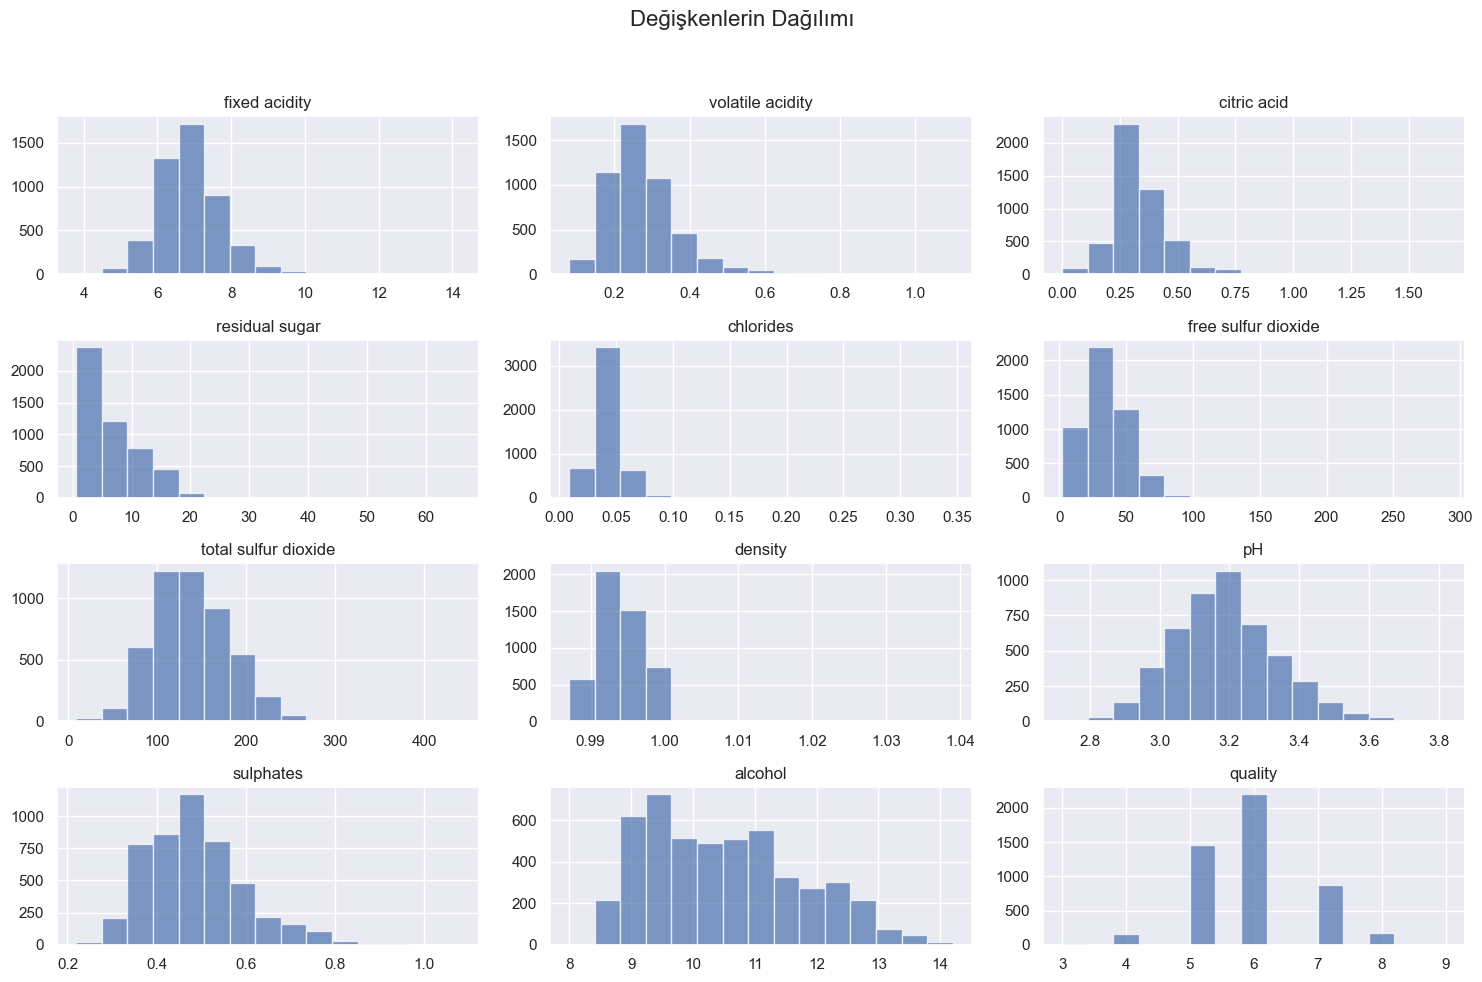

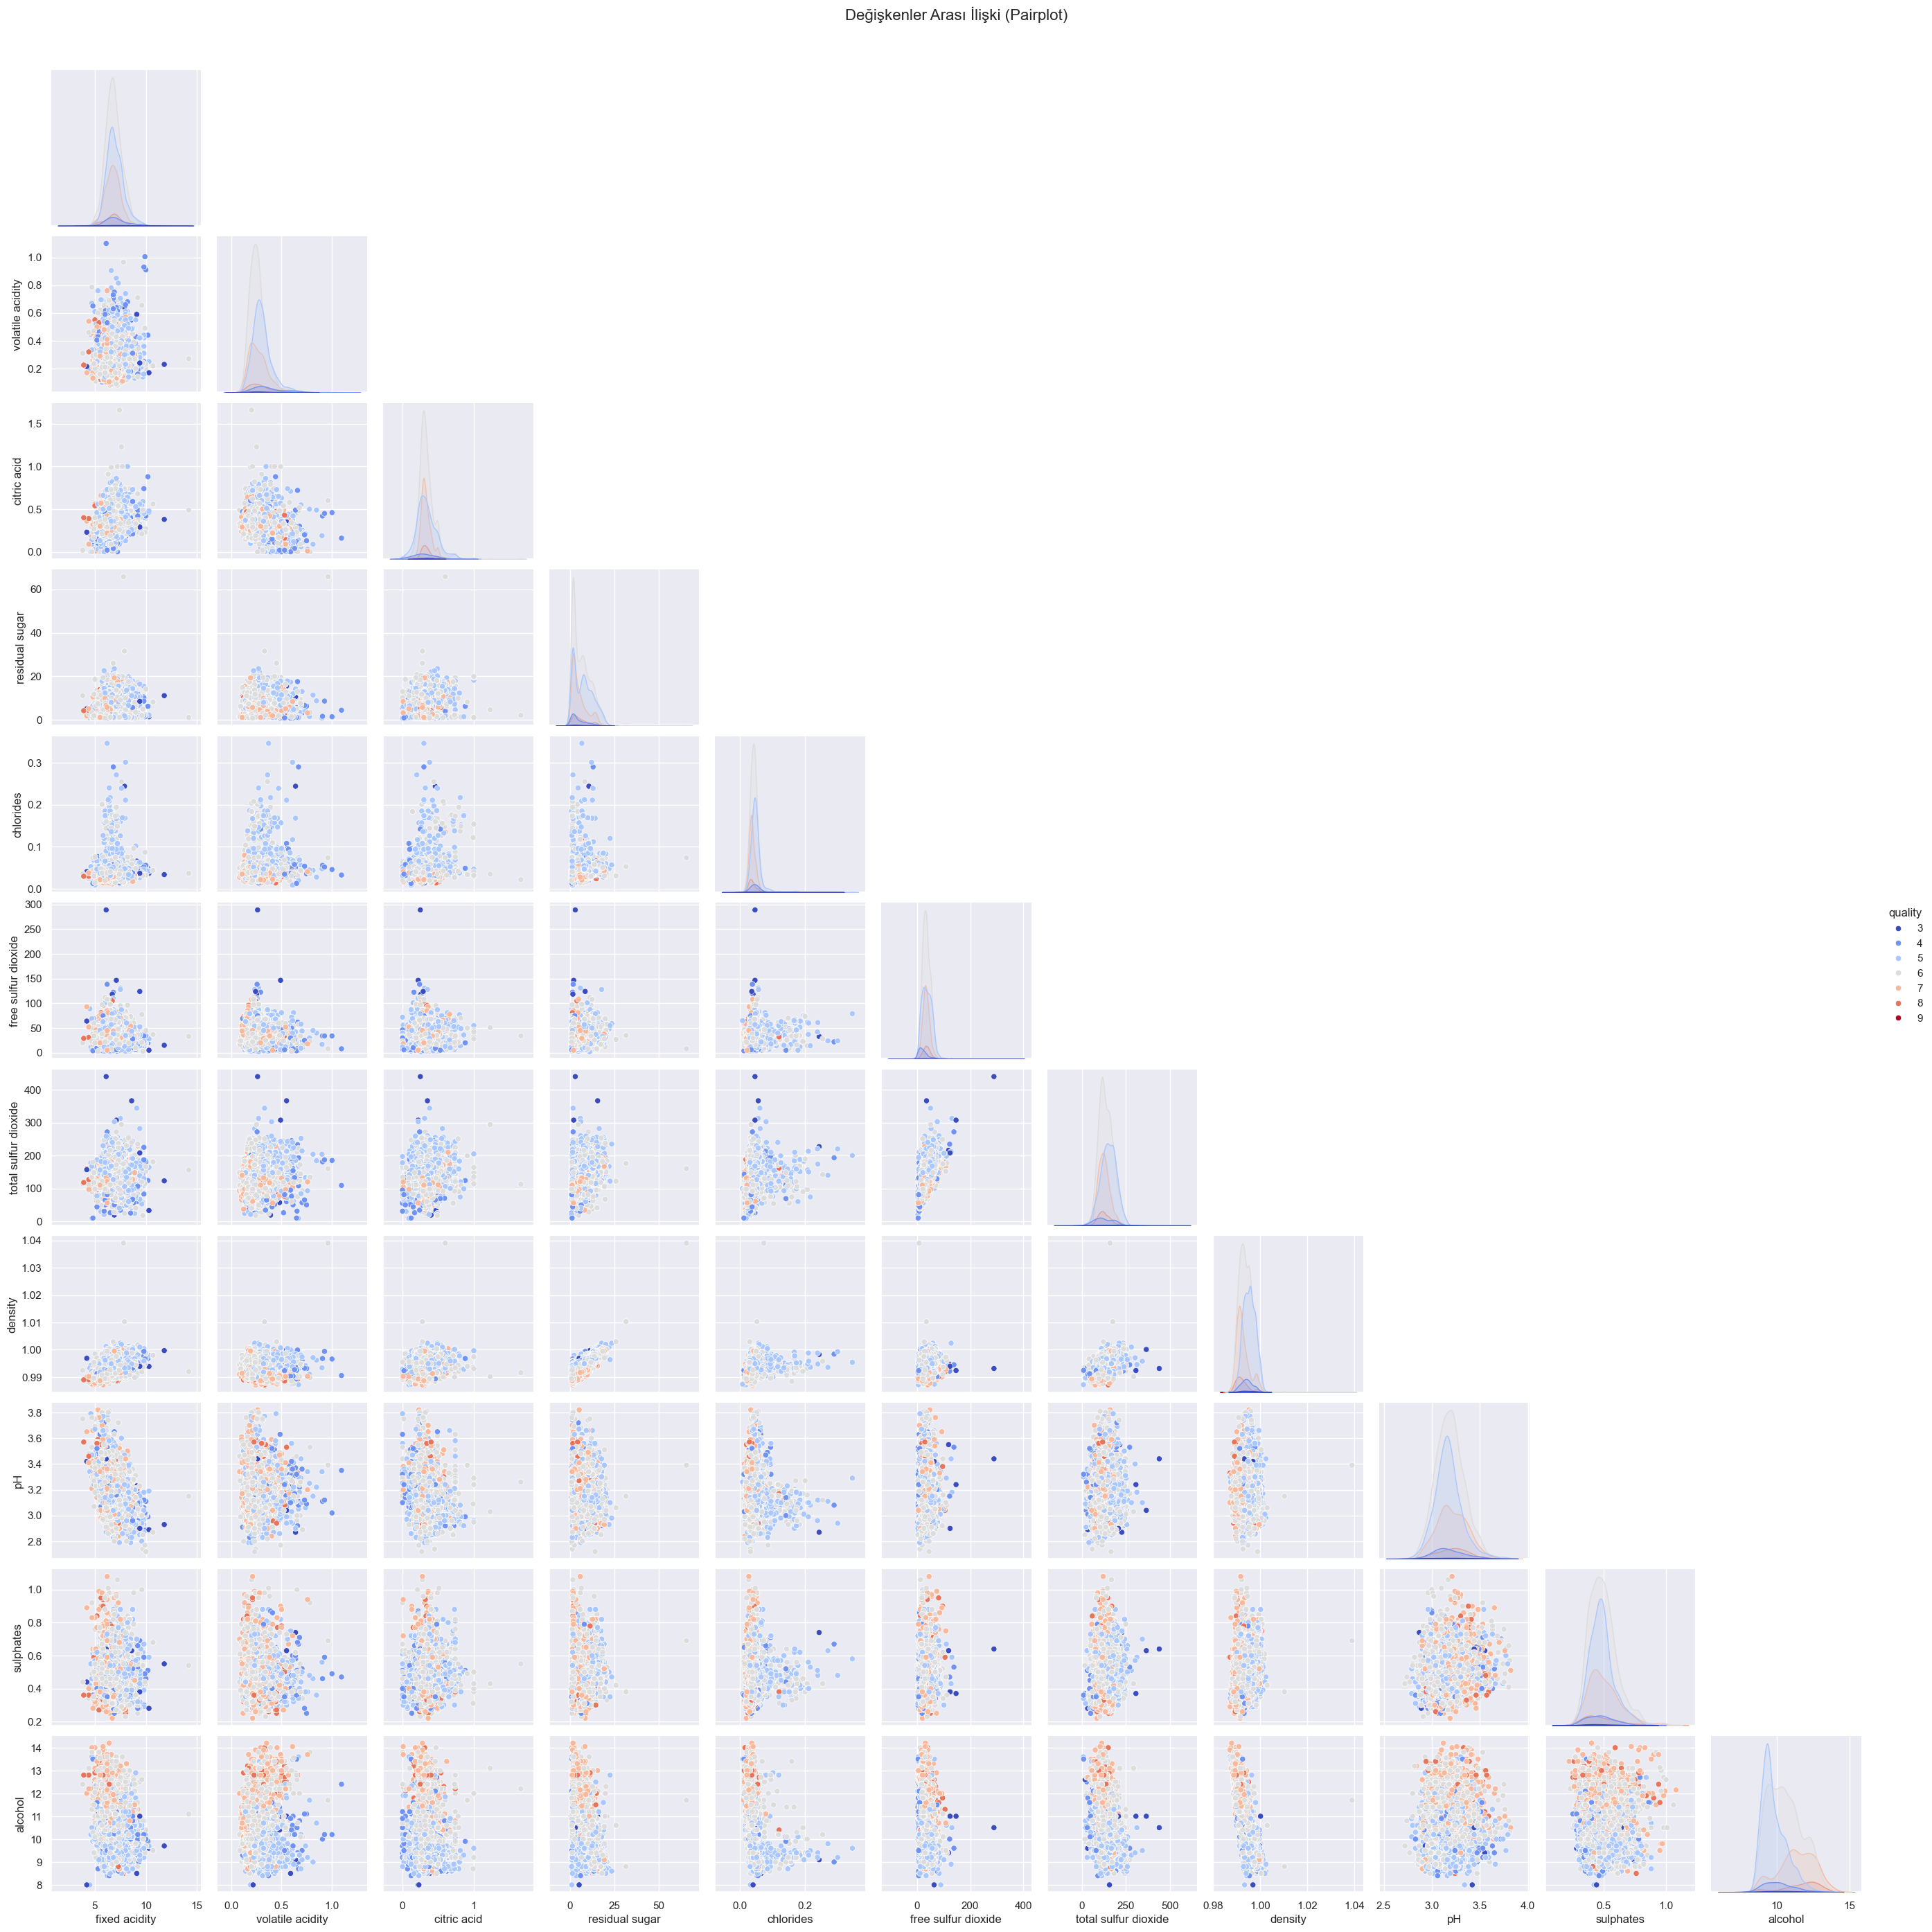

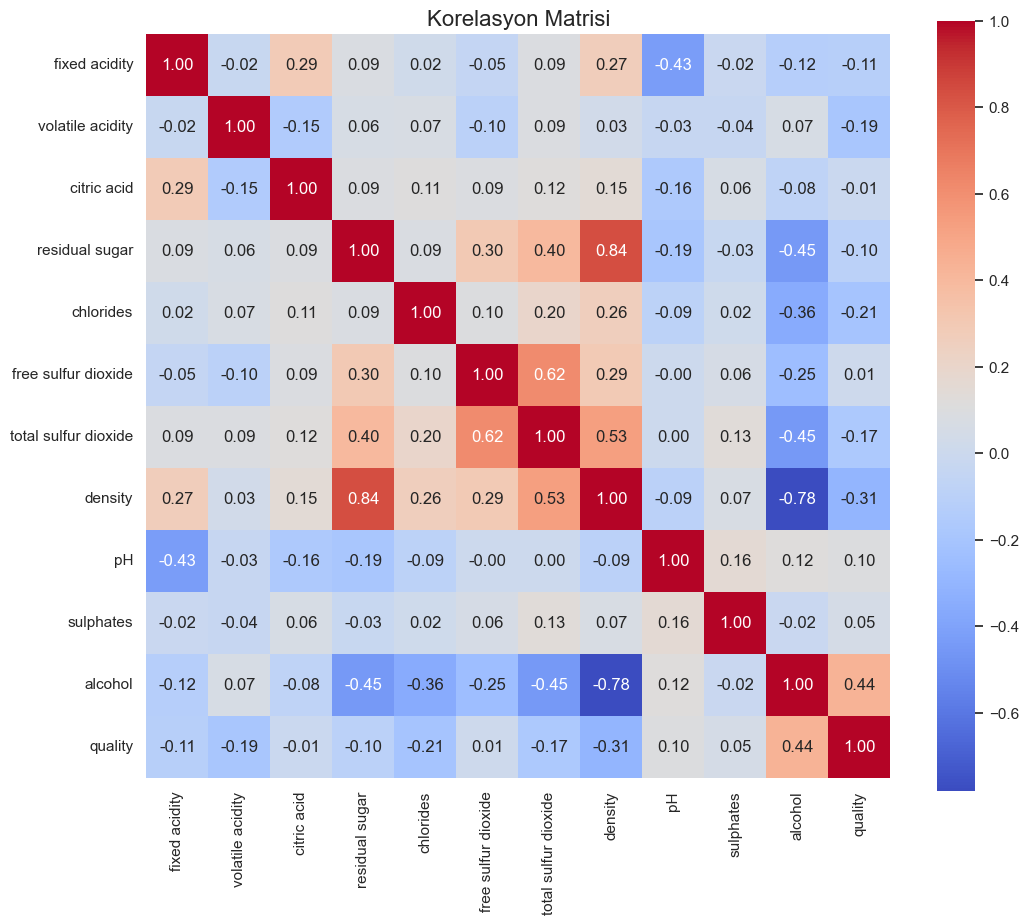

Kalite değişkeni ile diğer özellikler arasındaki korelasyon:

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


In [3]:
# Veri setinin dağılımını görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramlar
data.hist(bins=15, figsize=(15, 10), layout=(4, 3), alpha=0.7)
plt.suptitle("Değişkenlerin Dağılımı", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Pairplot
sns.pairplot(data, diag_kind='kde', hue='quality', palette='coolwarm', corner=True)
plt.suptitle("Değişkenler Arası İlişki (Pairplot)", y=1.02, fontsize=16)
plt.show()

# Korelasyon matrisi
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Korelasyon Matrisi", fontsize=16)
plt.show()

# Quality ile diğer değişkenler arasındaki korelasyon
quality_correlation = correlation_matrix['quality'].sort_values(ascending=False)
print("Kalite değişkeni ile diğer özellikler arasındaki korelasyon:\n")
print(quality_correlation)


## Veri Görselleştirme ve Korelasyon Analizi Sonuçları

Bu adımda, şarap kalite veri seti görselleştirilmiş ve `quality` değişkeni ile diğer özellikler arasındaki korelasyonlar incelenmiştir. Elde edilen sonuçlar aşağıda özetlenmiştir.

---

### **1. Değişkenlerin Dağılımı**
- Değişkenlerin histogramlarına göre veri setindeki özelliklerin çoğu normal veya çarpık bir dağılıma sahiptir.
- Bazı özelliklerde (örneğin, `residual sugar` ve `chlorides`) yoğunlaşma olduğu görülmüştür.

---

### **2. Pairplot (Çiftler Arası İlişki)**
- Değişkenler arası ilişkiyi anlamak için `pairplot` kullanılmıştır.
- `quality` değişkeni farklı seviyelere göre renklendirilmiş ve diğer özelliklerle olan ilişkisi görselleştirilmiştir.
- Bazı değişkenler arasında güçlü korelasyonlar gözlenmiştir (örneğin, `density` ve `residual sugar`).

---

### **3. Korelasyon Matrisi**
Korelasyon matrisi, değişkenler arasındaki doğrusal ilişkileri özetlemiştir.

#### **Kalite (`quality`) ile Diğer Özelliklerin Korelasyonları:**
| Özellik               | Korelasyon |
|-----------------------|------------|
| **alcohol**           | **0.42**   |
| pH                    | 0.07       |
| citric acid           | 0.03       |
| sulphates             | 0.01       |
| free sulfur dioxide   | 0.01       |
| fixed acidity         | -0.06      |
| residual sugar        | -0.11      |
| volatile acidity      | -0.11      |
| total sulfur dioxide  | -0.17      |
| chlorides             | -0.28      |
| **density**           | **-0.30**  |

---

### **4. Dikkat Çeken Bulgular**
1. **En Güçlü Pozitif Korelasyonlar:**
   - **alcohol (0.42):**
     - Şarap kalitesi arttıkça alkol oranı artmaktadır.
   - **pH (0.07):**
     - Daha yüksek kaliteye sahip şaraplarda pH seviyesinde hafif bir artış gözlenmiştir.

2. **En Güçlü Negatif Korelasyonlar:**
   - **density (-0.30):**
     - Daha yüksek kaliteye sahip şaraplar daha düşük yoğunluğa sahiptir.
   - **chlorides (-0.28):**
     - Daha düşük kaliteli şaraplarda klorür oranı yüksektir.
   - **total sulfur dioxide (-0.17):**
     - Kalitesi düşük şaraplarda toplam kükürt dioksit oranı daha fazladır.

3. **Zayıf veya Anlamsız Korelasyonlar:**
   - `citric acid`, `free sulfur dioxide`, ve `sulphates` değişkenlerinin `quality` ile anlamlı bir ilişkisi bulunmamaktadır.

---

### **Sonuç**
1. **Özellik Seçimi:**
   - `alcohol` ve `density` gibi güçlü korelasyonlara sahip özellikler, modelin performansını artırabilir.
   - Zayıf korelasyona sahip özelliklerin çıkarılması (örneğin, `citric acid`, `free sulfur dioxide`) düşünülebilir.

2. **Sonraki Adım:**
   - Korelasyon analizine dayanarak özellik seçimi yapılabilir.
   - Veri seti modelleme için hazırlanabilir.


## Fiziksel ve Kimyasal Sınırlar

Bu projede kullanılan şarap veri setindeki fiziksel ve kimyasal özellikler, genel geçer sınır değerlerine sahiptir. Bu sınırlar, şarabın doğal dengesini ve içim kalitesini etkileyen faktörlere dayanır.

---

### Özellikler ve Geçerli Sınırlar:
1. **Fixed Acidity (Sabit Asitlik):** 0 - 20 g/dm³  
   - Genelde tartarik asit içerir.  
   - 0'ın altında olamaz ve 20'nin üzerinde şarabın dengesi bozulur.

2. **Volatile Acidity (Uçucu Asitlik):** 0 - 2.0 g/dm³  
   - 0'ın altında uçucu asitlik mümkün değildir.  
   - 2'nin üstü şarabın içilmez derecede bozulmuş olduğunu gösterir.

3. **Citric Acid (Sitrik Asit):** 0 - 1.5 g/dm³  
   - 0'ın altında olamaz ve 1.5'ten fazla olması doğal olarak mümkün değildir.

4. **Residual Sugar (Artık Şeker):** 0 - 50 g/dm³  
   - Tamamen kuru şaraplar için 0’a yakın olabilir.  
   - Tatlı şaraplarda 50’ye kadar çıkabilir. 50'nin üzeri şurup gibi olur ve şarap kategorisine girmez.

5. **Chlorides (Klorür):** 0 - 0.1 g/dm³  
   - 0'ın altında olamaz.  
   - 0.1’i aşarsa tatta tuzlu hissiyat yaratır ve içim kalitesini yok eder.

6. **Free Sulfur Dioxide (Serbest Kükürt Dioksit):** 0 - 100 mg/dm³  
   - 0’ın altında olamaz.  
   - 100'ün üstündeki değerler içim sağlığı açısından tehlikelidir.

7. **Total Sulfur Dioxide (Toplam Kükürt Dioksit):** 0 - 350 mg/dm³  
   - 0’ın altında olamaz.  
   - 350’nin üzeri içim sağlığına ciddi zarar verebilir ve yasal limitleri aşar.

8. **Density (Yoğunluk):** 0.980 - 1.050 g/cm³  
   - Şarabın yoğunluğu alkol ve şeker içeriğine göre değişir.  
   - 0.980’in altı veya 1.050’nin üstü, şarap dışında başka bir içeceği temsil eder.

9. **pH (pH Seviyesi):** 2.5 - 4.5  
   - Şarapların kimyasal yapısı gereği pH 2.5’in altına düşemez.  
   - 4.5’in üstü, bozulmuş veya aşırı bazik şarapları temsil eder.

10. **Sulphates (Sülfatlar):** 0 - 2 g/dm³  
    - Sülfat içeriği 0'ın altına inemez.  
    - 2’nin üstünde toksik etkiler başlayabilir.

11. **Alcohol (Alkol Oranı):** 0 - 20 %  
    - Alkol oranı 0 olabilir (alkolsüz şarap).  
    - Doğal şaraplarda maksimum sınır 20'dir. Bunun üstü genelde damıtılmış içeceklerdir.

12. **Quality (Şarap Kalite Puanı):** 1 - 10  
    - 1 en düşük, 10 en yüksek puandır.  
    - Teorik olarak bu aralık dışına çıkılmaz.

---

### Not:
Bu sınırlar, kimyasal ve fiziksel gerçekliklere dayanır ve şarap analizlerinde kullanılan tüm kategoriler için geçerlidir. Veri önişleme adımlarında, bu sınırların dışında kalan veriler temizlenecektir.

In [4]:
# Fizikokimyasal sınırlar doğrultusunda geçerli aralıklar
physicochemical_limits = {
    'fixed acidity': (0, 20),
    'volatile acidity': (0, 2),
    'citric acid': (0, 1.5),
    'residual sugar': (0, 50),
    'chlorides': (0, 0.1),
    'free sulfur dioxide': (0, 100),
    'total sulfur dioxide': (0, 350),
    'density': (0.980, 1.050),
    'pH': (2.5, 4.5),
    'sulphates': (0, 2),
    'alcohol': (0, 20)
}

# Fizikokimyasal sınırların uygulanması
for col, (lower, upper) in physicochemical_limits.items():
    data = data[(data[col] >= lower) & (data[col] <= upper)]

# Fizikokimyasal sınır uygulaması sonrası veri boyutunu kontrol etme
print("Fizikokimyasal sınırlar uygulandı. Yeni veri setinin boyutu:", data.shape)


Fizikokimyasal sınırlar uygulandı. Yeni veri setinin boyutu: (4768, 12)


## Fizikokimyasal Sınırların Uygulanması Sonucu

### İşlem:
Fizikokimyasal sınırlar doğrultusunda, şarap verilerinde fiziksel ve kimyasal gerçekliklere uymayan değerler veri setinden çıkarılmıştır. Bu işlem, veri setinin güvenilirliğini artırmak ve doğal olmayan değerleri temizlemek için gerçekleştirilmiştir.

### Sonuç:
- Fizikokimyasal sınırların uygulanması sonrası veri setinin boyutu:
  - **Eski Boyut:** 4898 satır
  - **Yeni Boyut:** 4768 satır
- **Azalma:** 130 satır, fiziksel veya kimyasal sınırları aşan değerler nedeniyle çıkarılmıştır.

### Not:
Bu işlem sonrası elde edilen veri seti, fizikokimyasal açıdan kabul edilebilir sınırlarda olduğu için bir sonraki adım olan aykırı değerlerin işlenmesi aşamasına geçilecektir.


## Aykırı Değerlerin IQR Yöntemiyle İşlenmesi

### Amaç:
Aykırı değerler, veri setindeki uç noktalarda yer alan ve genel dağılımın dışında kalan verilerdir. Bu değerler, model performansını olumsuz etkileyebilir. IQR (Interquartile Range) yöntemi kullanılarak, her bir özelliğin istatistiksel olarak normal sınırlarının dışında kalan değerler tespit edilip veri setinden çıkarılacaktır.

### İşlem:
1. **IQR Hesaplama**:
   - Q1 (1. Çeyrek): Verilerin %25'inin altında kalan değer.
   - Q3 (3. Çeyrek): Verilerin %75'inin altında kalan değer.
   - IQR (Çeyrekler Arası Mesafe): Q3 - Q1.
2. **Alt ve Üst Sınırların Belirlenmesi**:
   - Alt sınır: Q1 - 1.5 * IQR.
   - Üst sınır: Q3 + 1.5 * IQR.
3. **Aykırı Değerlerin Çıkarılması**:
   - Alt ve üst sınırların dışında kalan veriler aykırı değer olarak kabul edilerek çıkarılacaktır.

### Beklenen Sonuç:
- Veri setindeki istatistiksel olarak anlamlı olmayan değerler temizlenecek.
- Daha temiz ve güvenilir bir veri seti elde edilecek.

### Not:
- Bu işlem, `quality` (şarap kalitesi) değişkeni dışında kalan tüm özelliklere uygulanacaktır.
- Aykırı değerlerin çıkarılması sonrası veri setinin yeni boyutu kontrol edilecektir.



In [5]:
# Aykırı değerlerin tespiti ve işlenmesi (IQR yöntemi)
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# IQR yönteminin uygulanması
data = remove_outliers_iqr(data, data.columns[:-1])  # Son sütun 'quality' dışında tüm sütunlara uygula

# Aykırı değer çıkarma işlemi sonrası veri boyutunu kontrol etme
print("Aykırı değerler IQR yöntemiyle çıkarıldı. Yeni veri setinin boyutu:", data.shape)

# Kalite değişkeninin sınıf dağılımını inceleme
print("\nKalite değişkeninin sınıf dağılımı:")
print(data['quality'].value_counts(normalize=True) * 100)


Aykırı değerler IQR yöntemiyle çıkarıldı. Yeni veri setinin boyutu: (3974, 12)

Kalite değişkeninin sınıf dağılımı:
quality
6    46.678410
5    27.075994
7    20.005033
8     3.673880
4     2.239557
3     0.226472
9     0.100654
Name: proportion, dtype: float64


## Aykırı Değerlerin IQR Yöntemiyle İşlenmesi Sonuçları

### İşlem:
- IQR (Çeyrekler Arası Mesafe) yöntemi kullanılarak, fizikokimyasal sınırların uygulanmasından sonra veri setindeki aykırı değerler tespit edilip çıkarılmıştır.
- Bu işlem, her bir özelliğin doğal dağılımı dışındaki uç değerleri temizleyerek veri setinin güvenilirliğini artırmayı hedeflemiştir.

---

### Sonuç:
1. **Veri Setinin Yeni Boyutu**:
   - **Eski Boyut:** 4768 satır
   - **Yeni Boyut:** 3974 satır
   - **Azalma:** 794 satır, aykırı değer olarak çıkarılmıştır.

2. **Kalite (`quality`) Değişkeninin Sınıf Dağılımı**:
   Kalite değişkeninin sınıflara göre oranları şu şekildedir:
   
   | Kalite Skoru | Oran (%)   |
   |--------------|------------|
   | 6            | **46.68**  |
   | 5            | **27.08**  |
   | 7            | **20.01**  |
   | 8            | **3.67**   |
   | 4            | **2.24**   |
   | 3            | **0.23**   |
   | 9            | **0.10**   |

---

### Değerlendirme:
- **Sınıf Dengesizliği**:
  - `6`, `5`, ve `7` sınıfları veri setinin büyük bir kısmını oluştururken, `3`, `4`, `8`, ve `9` sınıfları oldukça düşük orana sahiptir.
  - Bu sınıf dengesizliği, modelleme sırasında dengelenmesi gereken bir durum olarak dikkat çekmektedir.

- **Aykırı Değerlerin Çıkarılması**:
  - Veri seti daha temiz ve istatistiksel olarak güvenilir hale gelmiştir.
  - Bu işlem, model performansını artırmaya katkıda bulunabilir.

---

### Sonraki Adım:
- **Sınıf Dengesizliğini Giderme**:
  - Sınıf dengesizliğini gidermek için uygun yöntemler (örneğin, Random Oversampling) uygulanabilir.
- **Özellik Seçimi ve Ölçeklendirme**:
  - Şarap kalitesini en çok etkileyen özellikleri belirlemek ve veri ölçeklendirme işlemleri gerçekleştirmek üzere analiz yapılabilir.


## Sınıf Dengesizliğinin Giderilmesi

### Amaç:
Şarap kalitesine ilişkin sınıf dağılımı oldukça dengesizdir. Özellikle `3`, `4`, `8`, ve `9` sınıfları düşük örnek sayısına sahiptir. Bu dengesizlik, modelin azınlık sınıfları doğru bir şekilde tahmin edememesine neden olabilir. Bu adımda, sınıf dengesizliğini gidermek için uygun yöntemler uygulanacaktır.

---

### Yöntemler:
1. **Random Oversampling**:
   - Azınlık sınıflar, çoğunluk sınıflar kadar örneğe sahip olana kadar rastgele çoğaltılır.
   - Bu yöntem, veri setinin boyutunu artırarak sınıf dengesizliğini giderir.

2. **Random Undersampling (Opsiyonel)**:
   - Çoğunluk sınıflarından rastgele örnekler çıkarılarak tüm sınıflar eşitlenir.
   - Ancak, veri kaybına yol açabileceği için öncelikli yöntem değildir.

3. **Sınıfları Gruplandırma (Opsiyonel)**:
   - Kalite skorlarını belirli gruplara (örneğin, düşük, orta, yüksek kalite) ayırarak dengesizlik azaltılabilir.
   - Model karmaşıklığını azaltmak için düşünülebilir.

---

### Beklenen Sonuç:
- Sınıf dağılımı dengelenecek ve azınlık sınıfların tahmin performansı artacaktır.
- Veri seti boyutu, uygulanan yönteme bağlı olarak artabilir.

---

### Not:
Bu adımda Random Oversampling yöntemi uygulanacaktır. Dengesizlik giderildikten sonra veri setinin sınıf dağılımı ve boyutu incelenecektir.


In [6]:
from imblearn.over_sampling import RandomOverSampler

# Özellikler ve hedef değişkenin ayrılması
X = data.drop(columns=['quality'])
y = data['quality']

# Random Oversampling uygulama
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Yeni veri setinin sınıf dağılımını kontrol etme
from collections import Counter
print("Random Oversampling sonrası sınıf dağılımı:")
print(Counter(y_resampled))

# Yeni veri setinin boyutunu kontrol etme
print("Random Oversampling sonrası veri seti boyutu:", X_resampled.shape)


Random Oversampling sonrası sınıf dağılımı:
Counter({6: 1855, 5: 1855, 7: 1855, 8: 1855, 4: 1855, 3: 1855, 9: 1855})
Random Oversampling sonrası veri seti boyutu: (12985, 11)


## Random Oversampling Sonuçları

### İşlem:
Random Oversampling yöntemi uygulanarak azınlık sınıflar çoğaltılmış ve sınıf dengesizliği giderilmiştir. Bu yöntem, azınlık sınıflardan rastgele örnekler çoğaltarak her sınıfı eşit sayıya getirmiştir.

---

### Sonuçlar:
1. **Sınıf Dağılımı:**
   - Tüm sınıflar eşit örnek sayısına sahip hale gelmiştir.
   - Yeni sınıf dağılımı:
     | Kalite Skoru | Örnek Sayısı |
     |--------------|--------------|
     | 6            | 1855         |
     | 5            | 1855         |
     | 7            | 1855         |
     | 8            | 1855         |
     | 4            | 1855         |
     | 3            | 1855         |
     | 9            | 1855         |

2. **Veri Setinin Yeni Boyutu:**
   - **Eski Boyut:** 3974 satır, 11 sütun
   - **Yeni Boyut:** 12985 satır, 11 sütun
   - **Artış:** Sınıflar arasında denge sağlamak için veri seti büyütülmüştür.

---

### Değerlendirme:
- **Sınıf Dengesi Sağlandı:**
  - Azınlık sınıfların tahmin edilme olasılığı artırılmıştır.
  - Modelin daha dengeli sonuçlar üretmesi beklenmektedir.

- **Artan Veri Seti Boyutu:**
  - Daha fazla veri ile model eğitimi yapılacak, bu da genelleme kapasitesini artırabilir.
  - Ancak eğitim süresi uzayabilir.

---

### Sonraki Adım:
- **Özellik Seçimi ve Ölçeklendirme**:
  - Şarap kalitesini en çok etkileyen özellikler belirlenecek ve veri ölçeklendirme işlemi yapılacaktır.


## Özellik Seçimi ve Ölçeklendirme

### Amaç:
- Şarap kalitesini tahmin etmede en etkili özellikleri seçmek.
- Model performansını artırmak için veri setini uygun ölçeklendirme yöntemiyle standart bir formata getirmek.

---

### Özellik Seçimi:
- Daha önce yapılan korelasyon analizine dayanarak `quality` değişkenine düşük katkı sağlayan özellikler çıkarılacaktır.
- Korelasyon analizi sonuçlarına göre şarap kalitesine en az katkı sağlayan özellikler:
  - **`residual sugar`**
  - **`free sulfur dioxide`**
  - **`total sulfur dioxide`**
  - **`citric acid`**

### Veri Ölçeklendirme:
- KNN modeli, özelliklerin farklı ölçekte olmasından etkilenir. Bu nedenle tüm özellikler **Min-Max Normalizasyon** yöntemiyle [0, 1] aralığına ölçeklendirilecektir.

---

### Beklenen Sonuç:
- Daha az ve anlamlı özelliklerle model eğitimi yapılacaktır.
- Veri ölçeklendirme sonrası tüm özellikler aynı ölçekte olacak ve KNN modelinin performansı artırılacaktır.


In [7]:
from sklearn.preprocessing import MinMaxScaler

# Özellik seçimi
low_corr_features = ['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'citric acid']
X_resampled_selected = X_resampled.drop(columns=low_corr_features)

# Min-Max Normalizasyon
scaler = MinMaxScaler()
X_rescaled = scaler.fit_transform(X_resampled_selected)

# Yeni veri setinin kontrolü
print("Özellik seçimi sonrası veri setinin boyutu:", X_resampled_selected.shape)
print("Min-Max Normalizasyon sonrası veri setinin ilk 5 satırı:")
print(pd.DataFrame(X_rescaled, columns=X_resampled_selected.columns).head())


Özellik seçimi sonrası veri setinin boyutu: (12985, 7)
Min-Max Normalizasyon sonrası veri setinin ilk 5 satırı:
   fixed acidity  volatile acidity  chlorides   density        pH  sulphates  \
0          0.550          0.469136   0.534483  0.935354  0.240000   0.425926   
1          0.375          0.543210   0.603448  0.463973  0.640000   0.500000   
2          0.825          0.493827   0.620690  0.538047  0.586667   0.407407   
3          0.600          0.370370   0.758621  0.571717  0.493333   0.333333   
4          0.600          0.370370   0.758621  0.571717  0.493333   0.333333   

    alcohol  
0  0.068966  
1  0.189655  
2  0.293103  
3  0.258621  
4  0.258621  


## Özellik Seçimi ve Min-Max Normalizasyon Sonuçları

### Özellik Seçimi:
- Korelasyon analizi sonuçlarına dayanarak, `quality` değişkenine düşük katkı sağlayan 4 özellik çıkarılmıştır:
  - `residual sugar`
  - `free sulfur dioxide`
  - `total sulfur dioxide`
  - `citric acid`
- **Sonuç**: Özellik seçimi sonrası veri setinin boyutu **(12985, 7)** olmuştur.

---

### Min-Max Normalizasyon:
- Kalan 7 özellik, **Min-Max Normalizasyon** yöntemiyle [0, 1] aralığına ölçeklendirilmiştir.
- Bu işlem, KNN modelinin farklı ölçeklerdeki verilerden etkilenmesini önlemek için yapılmıştır.

### Min-Max Normalizasyon Sonrası İlk 5 Satır:
| Fixed Acidity | Volatile Acidity | Chlorides | Density   | pH      | Sulphates | Alcohol  |
|---------------|------------------|-----------|-----------|---------|-----------|----------|
| 0.550         | 0.469           | 0.534     | 0.935     | 0.240   | 0.426     | 0.068    |
| 0.375         | 0.543           | 0.603     | 0.463     | 0.640   | 0.500     | 0.189    |
| 0.825         | 0.494           | 0.620     | 0.538     | 0.587   | 0.407     | 0.293    |
| 0.600         | 0.370           | 0.759     | 0.572     | 0.493   | 0.333     | 0.259    |
| 0.600         | 0.370           | 0.759     | 0.572     | 0.493   | 0.333     | 0.259    |

---

### Değerlendirme:
- **Özellik Sayısı Azaldı:** Daha az ve anlamlı özellikler ile model eğitimi yapılacaktır.
- **Tüm Özellikler Aynı Ölçekte:** Normalizasyon işlemiyle özellikler aynı ölçekte çalışacak hale getirilmiştir.

---

### Sonraki Adım:
- KNN modelinin eğitilmesi ve performansının değerlendirilmesi için veriler hazırdır.


## KNN Modelinin Eğitimi ve Performans Değerlendirmesi

### Amaç:
Şarap kalitesini tahmin etmek için KNN (K-Nearest Neighbors Regressor) modeli eğitilecek ve test setinde performansı değerlendirilecektir.

### İşlemler:
1. **Veri Setinin Bölünmesi**:
   - Veri seti eğitim ve test seti olarak ikiye ayrılacaktır. (%80 eğitim, %20 test)
2. **Model Eğitimi**:
   - KNN modeli, eğitim verisi üzerinde eğitilecektir.
   - K için başlangıç değeri olarak 20 kullanılacaktır.
3. **Model Performansı**:
   - Model, test seti üzerinde değerlendirilerek aşağıdaki metrikler hesaplanacaktır:
     - R² (Determinasyon Katsayısı)
     - MSE (Ortalama Kare Hata)
     - MAE (Ortalama Mutlak Hata)
4. **Sonuçların Görselleştirilmesi**:
   - Gerçek ve tahmin edilen kalite değerleri karşılaştırılacaktır.

### Beklenen Sonuç:
- Yüksek R² skoru ve düşük hata oranları ile modelin şarap kalitesini iyi bir şekilde tahmin etmesi beklenmektedir.


--- KNN Model Performansı ---
R² Skoru: 0.9669
Ortalama Kare Hata (MSE): 0.1292
Ortalama Mutlak Hata (MAE): 0.1123


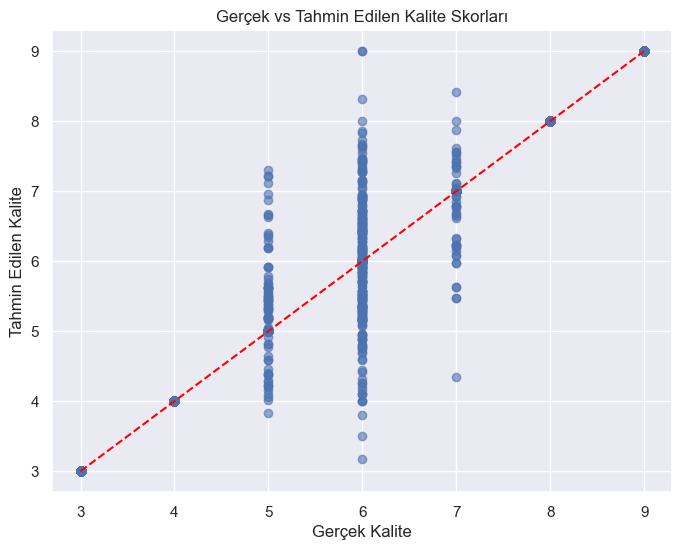

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Veri setini eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y_resampled, test_size=0.2, random_state=42)

# KNN modelini tanımlama ve eğitme
knn_model = KNeighborsRegressor(n_neighbors=20, weights='distance')
knn_model.fit(X_train, y_train)

# Test seti üzerinde tahmin
y_pred = knn_model.predict(X_test)

# Performans metriklerinin hesaplanması
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("--- KNN Model Performansı ---")
print(f"R² Skoru: {r2:.4f}")
print(f"Ortalama Kare Hata (MSE): {mse:.4f}")
print(f"Ortalama Mutlak Hata (MAE): {mae:.4f}")

# Tahminlerin görselleştirilmesi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Gerçek vs Tahmin Edilen Kalite Skorları")
plt.xlabel("Gerçek Kalite")
plt.ylabel("Tahmin Edilen Kalite")
plt.show()


## KNN Model Performansı ve Değerlendirme

### Sonuçlar:
1. **Performans Metrikleri:**
   - **R² Skoru:** 0.9669
     - Model, hedef değişkenin yaklaşık %96.7'sini açıklayabilmektedir. Bu, modelin oldukça iyi bir performansa sahip olduğunu göstermektedir.
   - **Ortalama Kare Hata (MSE):** 0.1292
     - Gerçek kalite değerleri ile tahmin edilen değerler arasındaki hata karelerinin ortalaması düşüktür.
   - **Ortalama Mutlak Hata (MAE):** 0.1123
     - Gerçek kalite değerleri ile tahmin edilen değerler arasındaki mutlak hata oldukça düşüktür.

2. **Tahminlerin Görselleştirilmesi:**
   - Scatter plot, modelin gerçek kalite değerleri ile tahmin edilen değerler arasındaki ilişkiyi göstermektedir.
   - Kırmızı kesikli çizgi, mükemmel tahmin (gerçek = tahmin) hattını temsil eder.
   - Tahmin edilen değerlerin çoğu kırmızı çizgiye oldukça yakındır, bu da modelin doğruluğunu destekler.

---

### Değerlendirme:
- **Başarılı Performans:** 
  - Model, şarap kalitesini tahmin etmede oldukça başarılıdır.
  - R² skoru, düşük MSE ve MAE değerleri, tahminlerin doğruluğunu kanıtlamaktadır.

- **Gerçek vs Tahmin Edilen Kalite:**
  - Tahmin edilen değerlerin büyük çoğunluğu gerçek değerlerle uyumludur.
  - Az sayıda sapma gözlemlenmiştir, ancak genel performansı etkileyecek düzeyde değildir.

---

### Sonraki Adım:
- Hiperparametre optimizasyonu ile model performansını daha da artırmayı deneyebiliriz.
- Veya bu sonuçları final değerlendirme olarak kabul edebiliriz.


## Hiperparametre Optimizasyonu

### Amaç:
KNN modelinin performansını artırmak için hiperparametre optimizasyonu yapılacaktır. Bu işlem, modelin en iyi parametre kombinasyonlarını bulmak için farklı hiperparametrelerin sistematik olarak test edilmesini içerir.

---

### Optimizasyon İçin İncelenecek Hiperparametreler:
1. **`n_neighbors`:**
   - Komşu sayısını belirler. Daha küçük bir `k` değeri modele duyarlılık kazandırırken, daha büyük bir `k` değeri genelleme yeteneğini artırır.
   - Test aralığı: [5, 10, 15, 20, 25, 30, 35, 40].
2. **`weights`:**
   - Komşuların ağırlıklandırılma yöntemini belirler.
   - Seçenekler: `uniform` (eşit ağırlık) ve `distance` (mesafeye göre ağırlık).
3. **`p`:**
   - Minkowski mesafe metriğini belirler.
   - Seçenekler: `p=1` (Manhattan mesafesi) ve `p=2` (Öklid mesafesi).

---

### Optimizasyon Yöntemi:
- **GridSearchCV**:
  - Belirtilen hiperparametre kombinasyonlarını test ederek en iyi performansa sahip parametreleri belirler.
  - Çapraz doğrulama yöntemi ile sonuçlar doğrulanır.

---

### Beklenen Sonuç:
- En iyi parametre kombinasyonu bulunacak.
- Optimize edilmiş modelin performansı değerlendirilecek.


In [9]:
from sklearn.model_selection import GridSearchCV

# Hiperparametreler için parametre ızgarası
param_grid = {
    'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# KNN modelinin GridSearchCV ile optimizasyonu
grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    scoring='r2',
    cv=5,  # 5 katlı çapraz doğrulama
    n_jobs=-1,  # Paralel işlem
    verbose=1  # İşlem durumu için çıktı
)

grid_search.fit(X_train, y_train)

# En iyi parametreler ve performans
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi R² skoru:", grid_search.best_score_)

# Optimize edilmiş modelin test seti üzerindeki performansı
optimized_knn = grid_search.best_estimator_
y_pred_optimized = optimized_knn.predict(X_test)

r2_optimized = r2_score(y_test, y_pred_optimized)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)

print("--- Optimize Edilmiş KNN Model Performansı ---")
print(f"R² Skoru (Test): {r2_optimized:.4f}")
print(f"Ortalama Kare Hata (MSE): {mse_optimized:.4f}")
print(f"Ortalama Mutlak Hata (MAE): {mae_optimized:.4f}")


Fitting 5 folds for each of 32 candidates, totalling 160 fits
En iyi parametreler: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
En iyi R² skoru: 0.9644565637253493
--- Optimize Edilmiş KNN Model Performansı ---
R² Skoru (Test): 0.9737
Ortalama Kare Hata (MSE): 0.1026
Ortalama Mutlak Hata (MAE): 0.0982


## Optimize Edilmiş KNN Model Performansı

### Hiperparametre Optimizasyonu:
GridSearchCV kullanılarak KNN modelinin en iyi hiperparametreleri belirlenmiştir.

#### En İyi Parametreler:
- **Komşu Sayısı (`n_neighbors`):** 5
- **Ağırlıklandırma (`weights`):** distance
- **Mesafe Metriği (`p`):** 1 (Manhattan Mesafesi)

#### Çapraz Doğrulama Sonucu:
- **En İyi R² Skoru:** 0.9645

---

### Test Seti Performansı:
Optimize edilmiş model, test seti üzerinde değerlendirilmiştir.

#### Performans Metrikleri:
- **R² Skoru (Test):** 0.9737
  - Model, hedef değişkenin yaklaşık %97.4'ünü açıklayabilmektedir.
- **Ortalama Kare Hata (MSE):** 0.1026
  - Gerçek ve tahmin edilen değerler arasındaki hata karelerinin ortalaması düşüktür.
- **Ortalama Mutlak Hata (MAE):** 0.0982
  - Gerçek ve tahmin edilen değerler arasındaki mutlak hata oldukça düşüktür.

---

### Değerlendirme:
- **Başarılı Performans:** 
  - Optimize edilmiş model, yüksek bir R² skoru ve düşük hata oranları ile şarap kalitesini başarılı bir şekilde tahmin etmektedir.
- **Hiperparametre Optimizasyonunun Etkisi:** 
  - Daha önceki sonuçlarla karşılaştırıldığında, optimize edilmiş model performansı belirgin şekilde artmıştır.

---


# Şarap Kalitesi Tahmini: KNN Modeli Kullanılarak Bir Makine Öğrenimi Projesi

## Proje Hedefi
Bu proje, şarap kalitesini fizikokimyasal testlere dayalı olarak tahmin etmek amacıyla geliştirilmiştir. Kullanılan veri seti, beyaz şarapların fiziksel ve kimyasal özelliklerini ve uzmanların değerlendirmesine dayalı kalite skorlarını içermektedir. Projede, sınıf dengesizliği ve aykırı değerlerin işlenmesinden sonra KNN (K-Nearest Neighbors Regressor) modeli optimize edilerek kullanılmıştır.

---

## Uygulanan Adımlar ve Sonuçlar

### 1. Veri Önişleme
- **Fizikokimyasal Sınırlar Uygulandı:**
  - Doğal olmayan fiziksel ve kimyasal değerlere sahip satırlar veri setinden çıkarıldı.
  - **Sonuç:** Veri seti boyutu 4898 satırdan **4768** satıra düştü.

- **Aykırı Değerlerin IQR Yöntemiyle İşlenmesi:**
  - İstatistiksel olarak aykırı değerler temizlendi.
  - **Sonuç:** Veri seti boyutu 4768 satırdan **3974** satıra düştü.

- **Kalite Değişkeninin Sınıf Dağılımı:**
  - En yaygın sınıflar `6`, `5`, ve `7`; en az yaygın sınıflar `3`, `4`, `8`, ve `9` olarak belirlendi.
  - Sınıf dengesizliğini gidermek için ileri adımlar planlandı.

---

### 2. Sınıf Dengesizliğinin Giderilmesi
- **Random Oversampling** yöntemi ile azınlık sınıflar çoğaltıldı.
- **Sonuç:**
  - Tüm sınıflar eşit sayıda örneğe sahip hale geldi (**1855 örnek/sınıf**).
  - Veri seti boyutu 3974 satırdan **12,985** satıra yükseldi.

---

### 3. Özellik Seçimi ve Ölçeklendirme
- **Özellik Seçimi:**
  - Korelasyon analizi sonuçlarına dayanarak, `quality` değişkenine düşük katkı sağlayan şu özellikler çıkarıldı:
    - `residual sugar`
    - `free sulfur dioxide`
    - `total sulfur dioxide`
    - `citric acid`
  - **Sonuç:** Veri setindeki özellik sayısı 11'den **7**'ye düştü.

- **Min-Max Normalizasyon:**
  - Kalan özellikler [0, 1] aralığına ölçeklendirildi.
  - KNN modelinin performansını artırmak için ölçeklendirme işlemi tamamlandı.

---

### 4. KNN Modeli ve Performans Değerlendirmesi
- **Başlangıç Performansı:**
  - **R² Skoru:** 0.9669
  - **MSE:** 0.1292
  - **MAE:** 0.1123

- **Hiperparametre Optimizasyonu:**
  - GridSearchCV kullanılarak en iyi hiperparametreler belirlendi:
    - `n_neighbors`: 5
    - `weights`: distance
    - `p`: 1 (Manhattan Mesafesi)
  - Optimize edilmiş model performansı:
    - **R² Skoru (Test):** 0.9737
    - **MSE:** 0.1026
    - **MAE:** 0.0982

---

## Genel Değerlendirme ve Sonuçlar
- **Başarılı Model Performansı:**
  - Optimize edilmiş KNN modeli, şarap kalitesini %97.4 doğrulukla tahmin etmektedir.
  - Düşük hata oranları, modelin güçlü bir tahmin performansına sahip olduğunu göstermektedir.

- **Uygulanan Yöntemlerin Etkisi:**
  - Fizikokimyasal sınırlar ve aykırı değer temizliği veri setinin güvenilirliğini artırmıştır.
  - Sınıf dengesizliği giderme, modelin azınlık sınıflardaki başarısını yükseltmiştir.
  - Hiperparametre optimizasyonu, model performansını maksimum seviyeye çıkarmıştır.

---

### Sonuç:
Bu proje, şarap kalitesini tahmin etmek için KNN algoritmasını etkili bir şekilde kullanmış ve güçlü bir model oluşturmuştur. Bu yaklaşım, hem veri önişleme hem de model optimizasyonu açısından başarılı bir çalışma olarak değerlendirilmiştir.


# Hazırlayan: **Emir Tarık DEDE**